In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [50]:
data = []
tempvalues = []

with open('/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Labs/Assignment/model_1/logs/Episode Ending actions.csv', 'r') as file:
    for line in file:
      
        # Remove brackets and split based on whitespace
        values = line.strip().replace('[', '').replace(']', '').replace('"','').split()
        if len(values)!= 6:
            tempvalues.extend(values)

        else:
            if len(tempvalues)==6:
                data.append([float(num) for num in tempvalues])
                tempvalues = []
            else:    
                data.append([float(num) for num in values])

data = np.array(data)

data = data[[len(row) == 6 for row in data]]


bad_first_three = data[:, :3]
bad_last_three = data[:, 3:]



In [60]:
good_data = []

with open('/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Labs/Assignment/model_1/logs/Good actions.csv', 'r') as file:
    for line in file:
       
        # Remove brackets and split based on whitespace
        values = line.strip().replace('[', '').replace(']', '').split(",")
        
        good_data.append([float(num) for num in values])
good_data = np.array(good_data)
good_first_three = good_data[:, :3]
good_last_three = good_data[:, 3:]

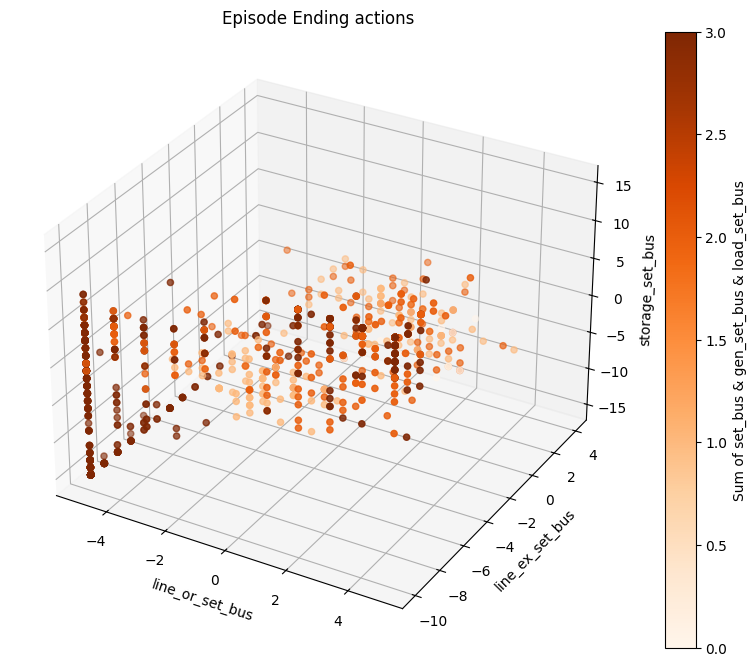

In [71]:

# Assume `data` is already loaded as in your provided code
bad_first_three = data[:, :3]
bad_last_three = data[:, 3:]

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use the first three values to determine the colors
# For simplicity, let's use the sum of the first three values to determine the color
colors = np.sum(bad_first_three, axis=1)

# Scatter plot of the last three values, with colors representing the sum of the first three values
sc = ax.scatter(bad_last_three[:, 0], bad_last_three[:, 1], bad_last_three[:, 2], 
                c=colors, cmap='Oranges', marker='o')

# Add color bar to interpret the color coding
plt.colorbar(sc, ax=ax, label='Sum of set_bus & gen_set_bus & load_set_bus')


# Add labels and title
ax.set_title('Episode Ending actions')
ax.set_xlabel('line_or_set_bus')
ax.set_ylabel('line_ex_set_bus')
ax.set_zlabel('storage_set_bus')

# Show the plot
plt.show()

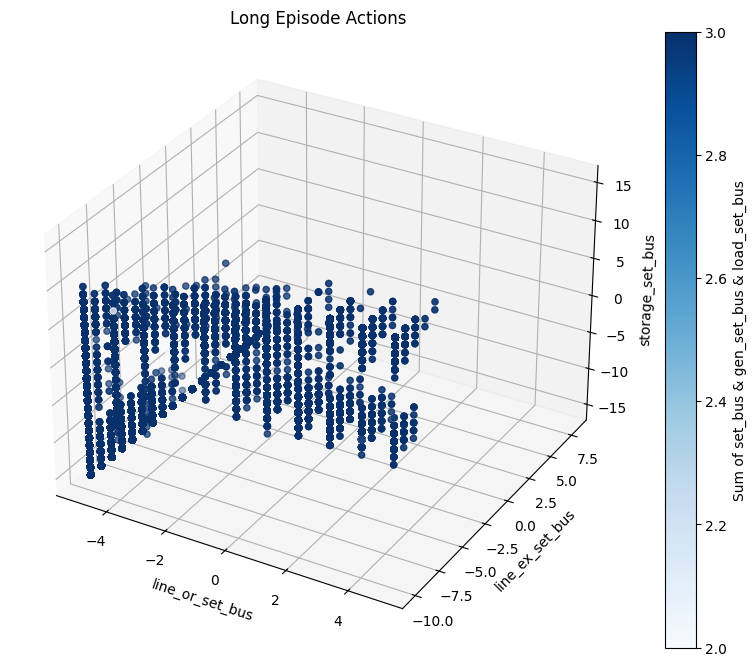

In [70]:

# Assume `data` is already loaded as in your provided code
good_first_three = good_data[:, :3]
good_last_three = good_data[:, 3:]

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use the first three values to determine the colors
# For simplicity, let's use the sum of the first three values to determine the color
colors = np.sum(good_first_three, axis=1)

# Scatter plot of the last three values, with colors representing the sum of the first three values
sc = ax.scatter(good_last_three[:, 0], good_last_three[:, 1], good_last_three[:, 2], 
                c=colors, cmap='Blues', marker='o')

# Add color bar to interpret the color coding
plt.colorbar(sc, ax=ax, label='Sum of set_bus & gen_set_bus & load_set_bus')

# Add labels and title
ax.set_title('Long Episode Actions')
ax.set_xlabel('line_or_set_bus')
ax.set_ylabel('line_ex_set_bus')
ax.set_zlabel('storage_set_bus')


# Show the plot
plt.show()

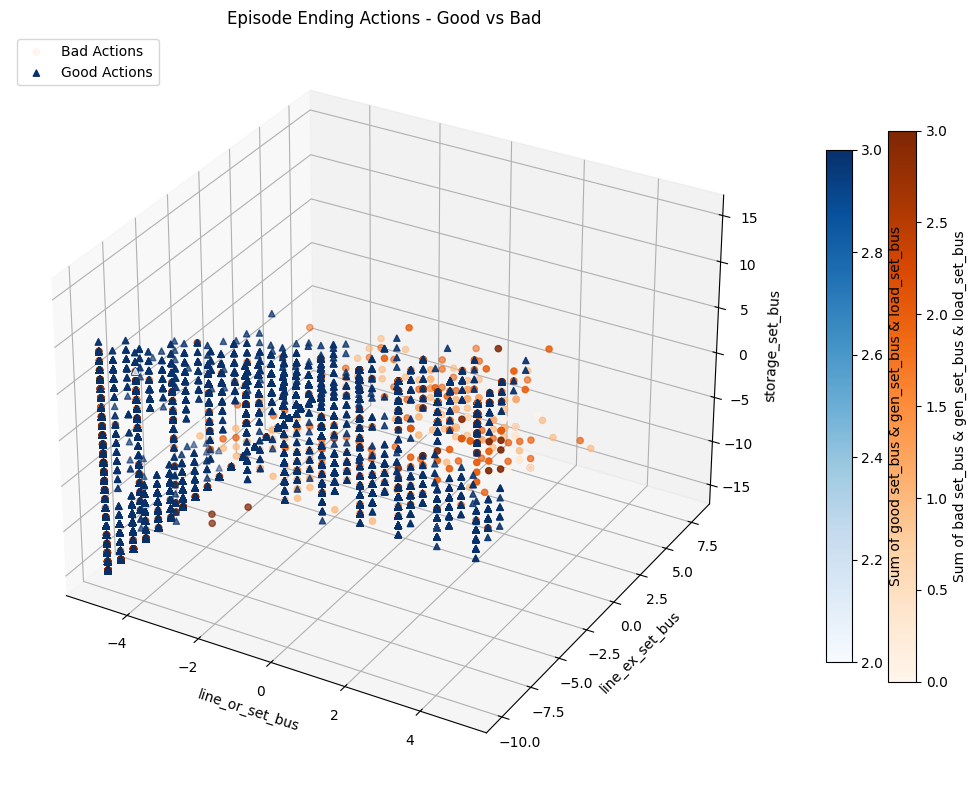

In [72]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Colors based on the sum of the first three values
bad_colors = np.sum(bad_first_three, axis=1)
good_colors = np.sum(good_first_three, axis=1)

# Scatter plot for bad_last_three with 'Oranges' colormap
sc_bad = ax.scatter(bad_last_three[:, 0], bad_last_three[:, 1], bad_last_three[:, 2], 
                    c=bad_colors, cmap='Oranges', marker='o', label='Bad Actions')

# Scatter plot for good_last_three with 'Blues' colormap
sc_good = ax.scatter(good_last_three[:, 0], good_last_three[:, 1], good_last_three[:, 2], 
                     c=good_colors, cmap='Blues', marker='^', label='Good Actions')

# Add color bars for each scatter plot to interpret the color coding
cbar_bad = plt.colorbar(sc_bad, ax=ax, fraction=0.03, pad=0.04)
cbar_good = plt.colorbar(sc_good, ax=ax, fraction=0.03, pad=0.08)

cbar_bad.set_label('Sum of bad set_bus & gen_set_bus & load_set_bus', fontsize=10)
cbar_good.set_label('Sum of good set_bus & gen_set_bus & load_set_bus', fontsize=10)

# Add labels, title, and legend
ax.set_title('Episode Ending Actions - Good vs Bad')
ax.set_xlabel('line_or_set_bus')
ax.set_ylabel('line_ex_set_bus')
ax.set_zlabel('storage_set_bus')
ax.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

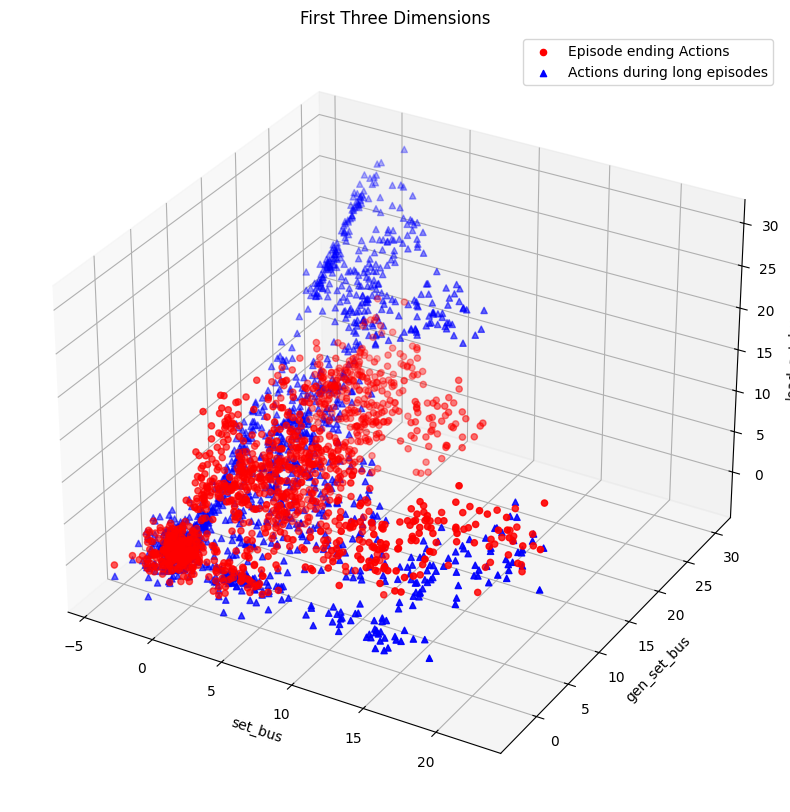

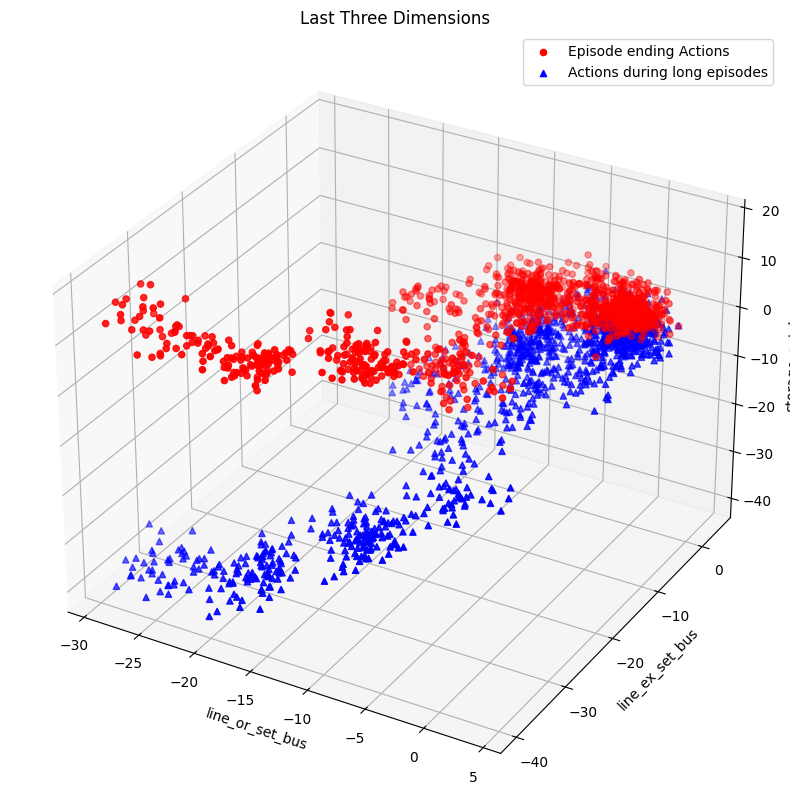

In [48]:

fig1 = plt.figure(figsize=(10, 10))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(bad_first_three[:, 0], bad_first_three[:, 1], bad_first_three[:, 2], c='red', marker='o', label="Episode ending Actions")
ax1.scatter(good_first_three[:,0], good_first_three[:, 1], good_first_three[:,1], c = 'blue', marker="^", label= "Actions during long episodes")

ax1.set_title('First Three Dimensions')
ax1.set_xlabel('set_bus')
ax1.set_ylabel('gen_set_bus')
ax1.set_zlabel('load_set_bus')
ax1.legend()


fig2 = plt.figure(figsize=(10, 10))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(bad_last_three[:, 0], bad_last_three[:, 1], bad_last_three[:, 2], c='red', marker='o',  label="Episode ending Actions")
ax2.scatter(good_last_three[:,0], good_last_three[:, 1], good_last_three[:,1], c = 'blue', marker="^", label= "Actions during long episodes")

ax2.set_title('Last Three Dimensions')
ax2.set_xlabel('line_or_set_bus')
ax2.set_ylabel('line_ex_set_bus')
ax2.set_zlabel('storage_set_bus')
ax2.legend()

plt.show()

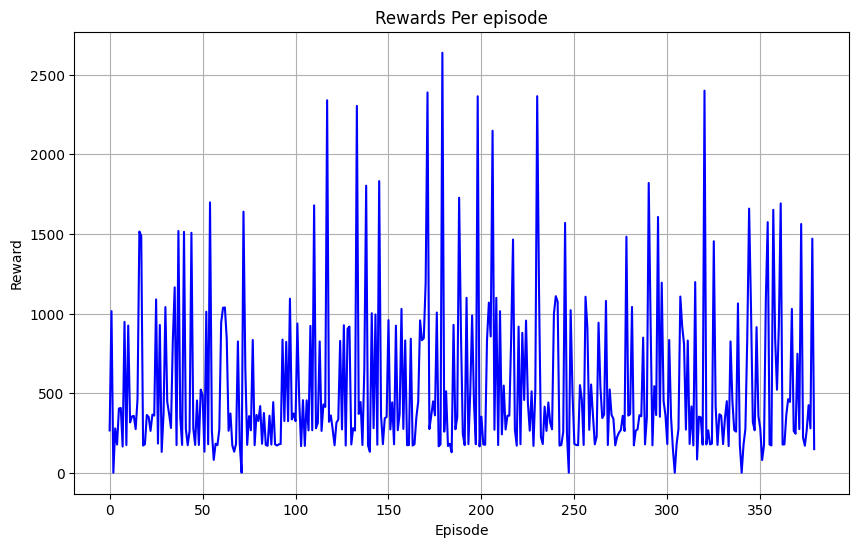

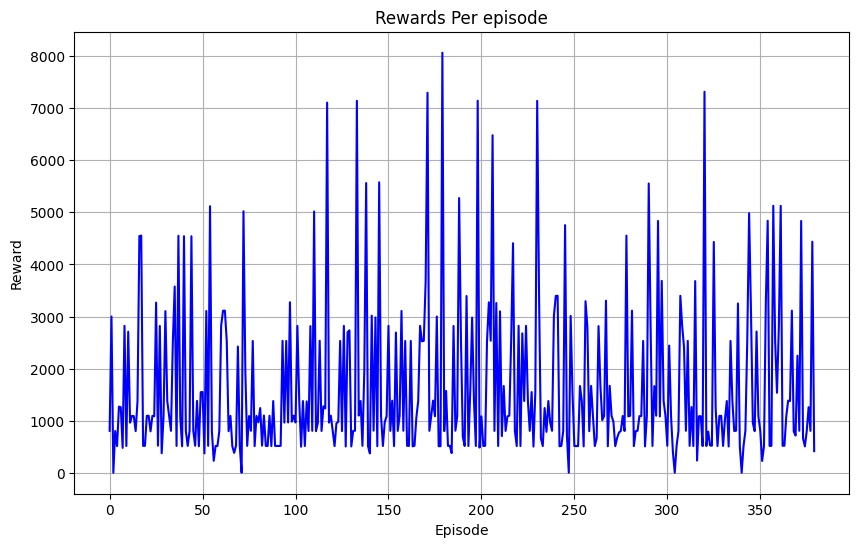

In [12]:
paths = ["/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Labs/Assignment/model_1/Multi agent logs/Multiagent_rewards_2a.txt","/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Labs/Assignment/model_1/Multi agent logs/Multiagent_length_2a.txt"]
def plot_reward_and_length(paths, n):
    rewards = []
    lengths = []
    for i in range(n):
        with open(paths[i], 'r') as file:
            for line in file:
                value = float(line.strip())
                rewards.append(value)
    
    for j in range(n,n+1):
        with open(paths[j], 'r') as newfile:
            for line in newfile:
                value = int(line.strip())
                lengths.append(value)

    plt.figure(figsize=(10, 6))
    plt.plot(rewards, linestyle='-', color='b')
    plt.title('Rewards Per episode')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.grid()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(lengths, linestyle='-', color='b')
    plt.title('Rewards Per episode')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.grid()
    plt.show()

plot_reward_and_length(paths,1)

